# Dose Results

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import patients, par_names, get_dose_df, par_names, get_percent_diff

## Full 100 Iterations

In [2]:
full_df = pd.concat([get_dose_df(plan_type) for plan_type in ['clinical', 'random', 'bayes']])
full_df.groupby(['dose_name', 'plan_type'])['dose_val'].describe()

count         mean          std          min  \
dose_name             plan_type                                                 
10_SpinalCord_MaxDVH  bayes       10.0   447.452567   145.392724   220.757532   
                      clinical    10.0   962.580259   526.320073   265.033790   
                      random      10.0   594.958876   227.711040   223.914544   
11_SpinalCord_MaxDose bayes       10.0   703.760588   328.344550   253.718079   
                      clinical    10.0  1220.050488   707.911458   315.778000   
                      random      10.0   812.224387   364.737170   262.147980   
1_Chestwall_MaxDVH    bayes       10.0  2211.581853   456.918740  1651.997236   
                      clinical    10.0  2213.491370   377.905211  1665.838022   
                      random      10.0  2238.529863   485.154521  1634.359868   
2_D2cm_MaxDose        bayes       10.0  2581.496782   235.978445  2349.426270   
                      clinical    10.0  2827.429706   712.423734  2321.516357   
                      random      10.0  2520.811862   236.554510  2256.229492   
3_Esophagus_MaxDVH    bayes       10.0   455.141414   279.773822    84.946228   
                      clinical    10.0   365.552510   198.664484   116.129008   
                      random      10.0   417.877848   205.031207    93.327185   
4_Lungs_MaxDVH        bayes       10.0    68.614280    76.056345    13.141909   
                      clinical    10.0    68.351877    82.148902    12.869589   
                      random      10.0    67.968160    71.057841    13.878679   
5_Lungs_MaxDVH        bayes       10.0   146.002756   113.106330    27.417393   
                      clinical    10.0   132.954377   113.179787    27.435992   
                      random      10.0   151.938867   112.906912    30.543015   
7_PTV_MaxDose         bayes       10.0  7146.276985   385.648095  6505.124023   
                      clinical    10.0  6784.967125   840.565515  5897.977051   
                      random      10.0  7095.350567   323.565649  6679.728027   
8_Rib_MaxDVH          bayes       10.0  3141.625959   895.434123  2112.293300   
                      clinical    10.0  3465.115452   891.595498  2311.379703   
                      random      10.0  3190.978911   790.920814  2340.192849   
9_Rib_MaxDose         bayes       10.0  4478.729875  1349.672470  2648.041748   
                      clinical    10.0  4717.237702  1135.317806  3062.360528   
                      random      10.0  4515.953504  1156.076086  2781.295898   

                                         25%          50%          75%  \
dose_name             plan_type                                          
10_SpinalCord_MaxDVH  bayes       369.416414   418.172982   512.956102   
                      clinical    684.650965   871.041300  1217.526958   
                      random      413.930958   637.503614   741.033345   
11_SpinalCord_MaxDose bayes       444.217979   663.195343   996.820709   
                      clinical    812.829694  1099.297415  1628.339277   
                      random      511.298790   819.074158  1070.213974   
1_Chestwall_MaxDVH    bayes      1919.560152  2112.828154  2568.840302   
                      clinical   1932.207474  2252.075721  2402.387757   
                      random     1935.787173  2108.711108  2580.918920   
2_D2cm_MaxDose        bayes      2380.616821  2546.469116  2676.607880   
                      clinical   2381.644292  2587.827079  2984.870924   
                      random     2319.452332  2479.777100  2719.137260   
3_Esophagus_MaxDVH    bayes       214.958536   470.937882   627.035858   
                      clinical    213.350509   348.110062   495.384585   
                      random      213.536074   524.228842   584.235692   
4_Lungs_MaxDVH        bayes        16.114903    62.953231    74.490415   
                      clinical     14.167678    53.909187    64.422450   
                      random      

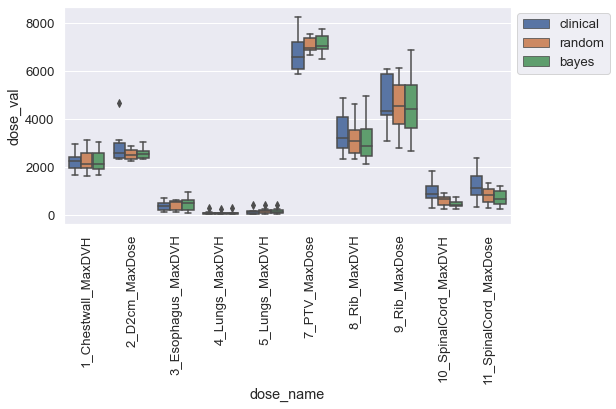

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

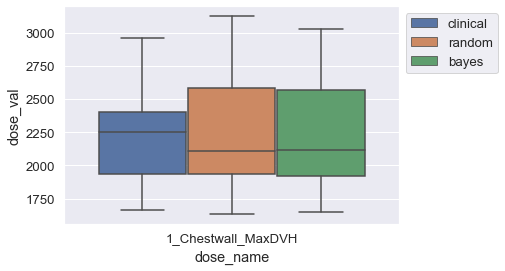

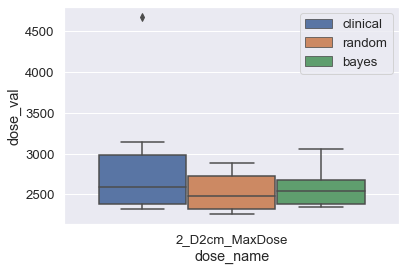

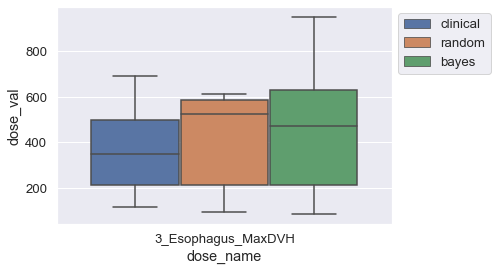

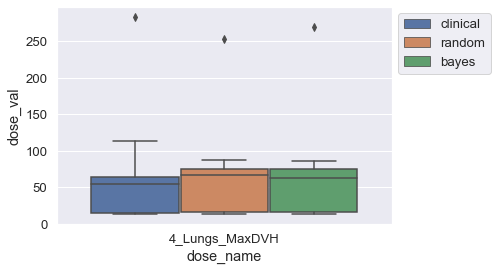

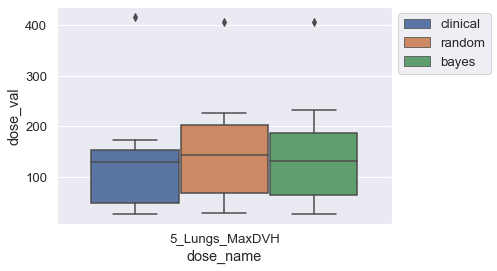

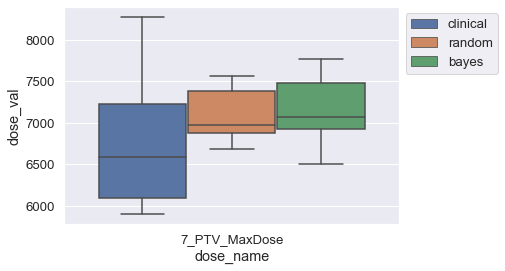

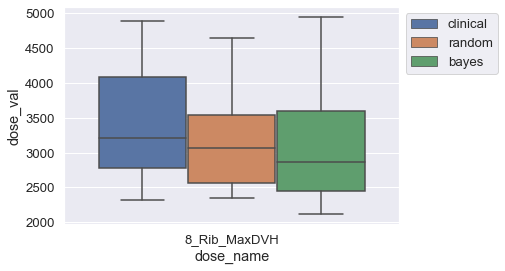

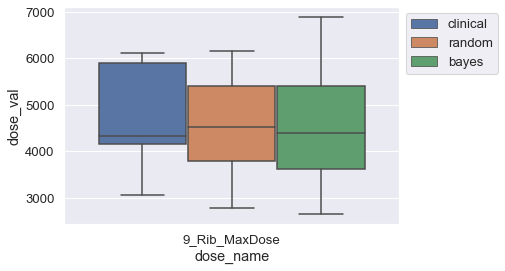

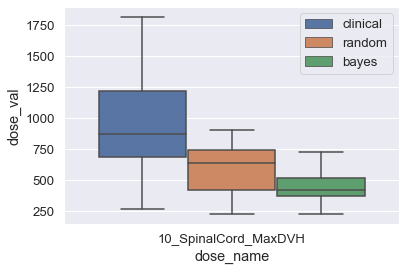

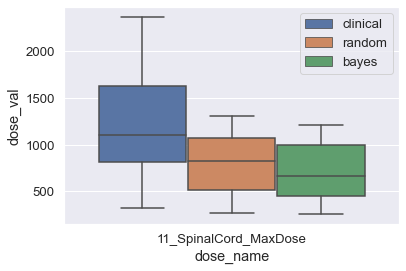

In [4]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=full_df[full_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare to goal values

In [5]:
def get_dose_diff(row):
    return get_percent_diff(row, 'dose_val', 'goal_val')

full_df['dose_diff'] = full_df.apply(get_dose_diff, axis=1)
full_df.groupby(['dose_name', 'plan_type'])['dose_diff'].describe()

count       mean        std        min  \
dose_name             plan_type                                           
10_SpinalCord_MaxDVH  bayes       10.0 -67.099076  10.690642 -83.767829   
                      clinical    10.0 -29.222040  38.700005 -80.512221   
                      random      10.0 -56.253024  16.743459 -83.535695   
11_SpinalCord_MaxDose bayes       10.0 -72.932285  12.628637 -90.241612   
                      clinical    10.0 -53.074981  27.227364 -87.854692   
                      random      10.0 -68.760600  14.028353 -89.917385   
1_Chestwall_MaxDVH    bayes       10.0 -26.280605  15.230625 -44.933425   
                      clinical    10.0 -26.216954  12.596840 -44.472066   
                      random      10.0 -25.382338  16.171817 -45.521338   
2_D2cm_MaxDose        bayes       10.0  -0.198588   5.229875  -9.765839   
                      clinical    10.0   9.840739  30.545785  -9.273945   
                      random      10.0  -2.506198   6.510575 -11.200853   
3_Esophagus_MaxDVH    bayes       10.0 -75.790350  14.881586 -95.481584   
                      clinical    10.0 -80.555718  10.567260 -93.822925   
                      random      10.0 -77.772455  10.905915 -95.035788   
4_Lungs_MaxDVH        bayes       10.0 -94.084976   6.556581 -98.867077   
                      clinical    10.0 -94.107597   7.081802 -98.890553   
                      random      10.0 -94.140676   6.125676 -98.803562   
5_Lungs_MaxDVH        bayes       10.0 -88.225584   9.121478 -97.788920   
                      clinical    10.0 -89.277873   9.127402 -97.787420   
                      random      10.0 -87.746866   9.105396 -97.536854   
7_PTV_MaxDose         bayes       10.0 -10.671538   4.820601 -18.685950   
                      clinical    10.0 -15.187911  10.507069 -26.275287   
                      random      10.0 -11.308118   4.044571 -16.503400   
8_Rib_MaxDVH          bayes       10.0  -1.824189  27.982316 -33.990834   
                      clinical    10.0   8.284858  27.862359 -27.769384   
                      random      10.0  -0.281909  24.716275 -26.868973   
9_Rib_MaxDose         bayes       10.0  11.968247  33.741812 -33.798956   
                      clinical    10.0  17.930943  28.382945 -23.440987   
                      random      10.0  12.898838  28.901902 -30.467603   

                                       25%        50%        75%        max  
dose_name             plan_type                                              
10_SpinalCord_MaxDVH  bayes     -72.837028 -69.251987 -62.282640 -46.912742  
                      clinical  -49.658017 -35.952846 -10.475959  33.848252  
                      random    -69.563900 -53.124734 -45.512254 -33.816400  
11_SpinalCord_MaxDose bayes     -82.914693 -74.492487 -61.660742 -53.556023  
                      clinical  -68.737319 -57.719330 -37.371566  -8.828313  
                      random    -80.334662 -68.497148 -58.837924 -49.584805  
1_Chestwall_MaxDVH    bayes     -36.014662 -29.572395 -14.371990   0.836173  
                      clinical  -35.593084 -24.930809 -19.920408  -1.331335  
                      random    -35.473761 -29.709630 -13.969369   4.127405  
2_D2cm_MaxDose        bayes      -2.158475  -1.588969   1.817615   7.723211  
                      clinical   -3.138505   3.315891   4.701940  94.904413  
                      random     -6.068705  -4.564679  -1.406782   9.496489  
3_Esophagus_MaxDVH    bayes     -88.566035 -74.950113 -66.647029 -49.472683  
                      clinical  -88.651569 -81.483507 -73.649756 -63.349724  
                      random    -88.641698 -72.115487 -68.923633 -67.546816  
4_Lungs_MaxDVH        bayes     -98.610784 -94.572997 -93.578412 -76.785862  
                      clinical  -98.778648 -95.352656 -94.446341 -75.561520  
                      random    -98.566401 -94.303007 -93.597158 -78.226324  
5_Lungs_MaxDVH        bayes     -94.696665 -89.371905 -84.868325 -67.312

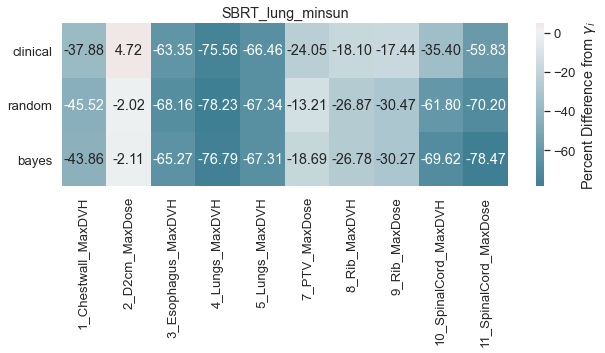

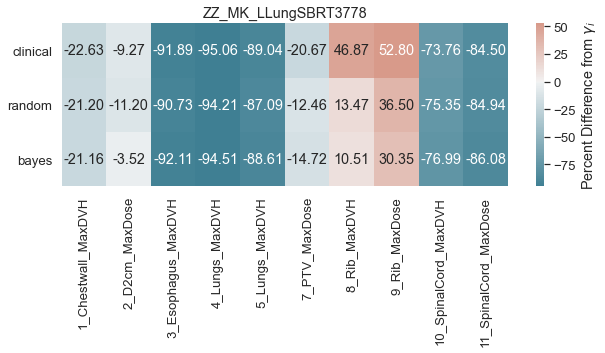

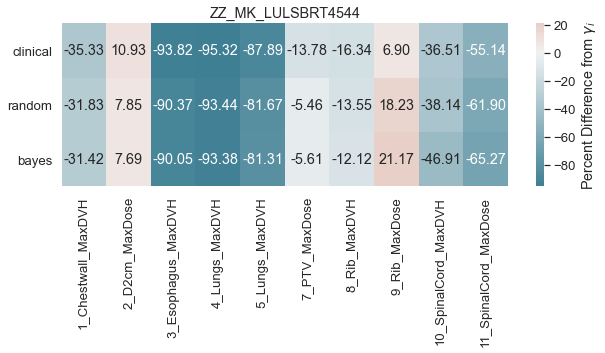

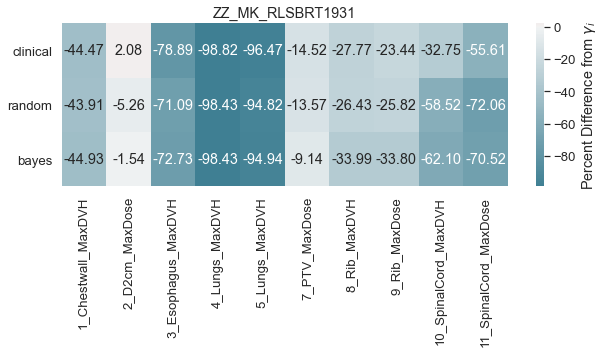

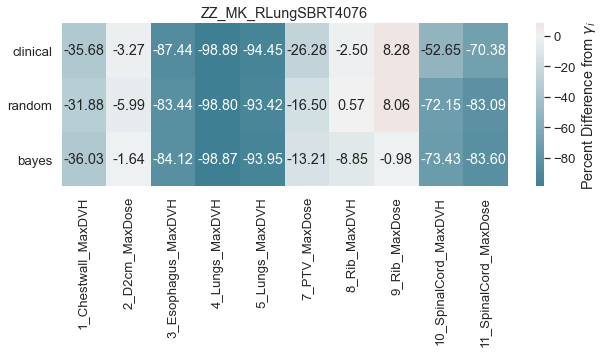

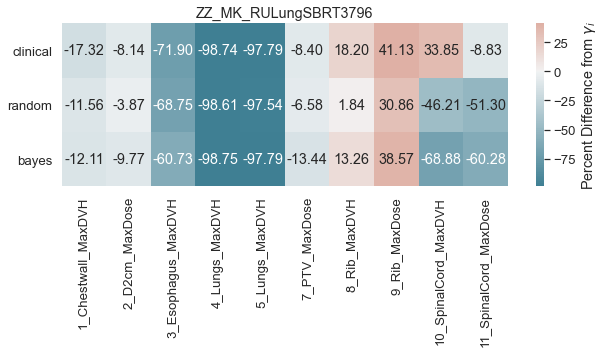

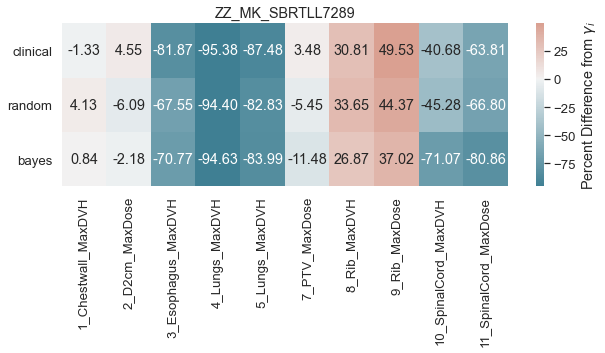

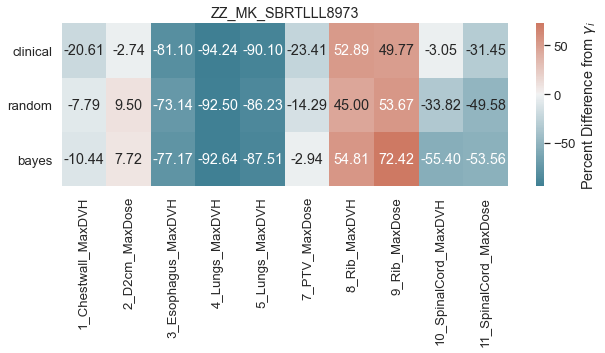

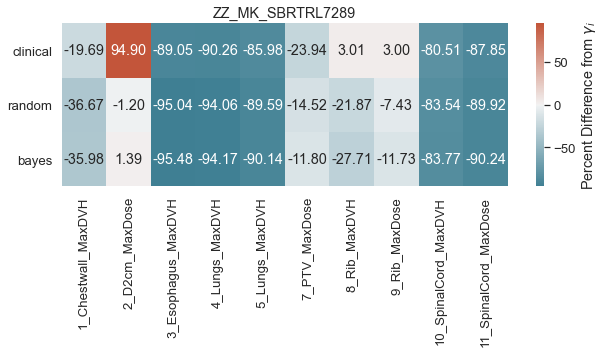

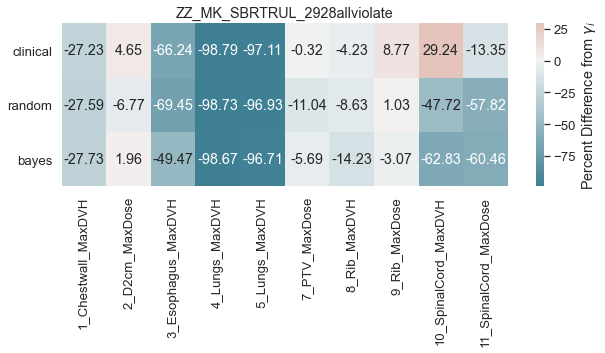

In [6]:
plan_types = ['clinical', 'random', 'bayes']
for patient in patients:
    df_sub = full_df[full_df['patient'] == patient]
    dose_vals = np.array([df_sub[df_sub['plan_type'] == plan_type]['dose_diff'].values
                          for plan_type in plan_types])
    fig, ax = plt.subplots(figsize=(dose_vals.shape[1], dose_vals.shape[0]))
    sns.heatmap(dose_vals, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from $\gamma_i$'}, ax=ax)
    ax.set_xticklabels(par_names, rotation=90)
    ax.set_yticklabels(plan_types, rotation=0)
    ax.set_title(patient)

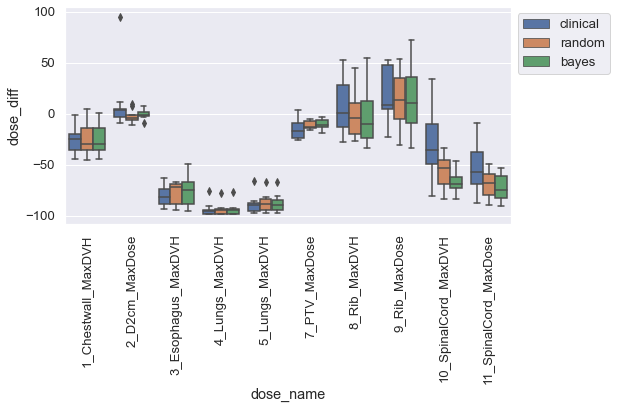

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_diff', hue='plan_type', data=full_df, ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

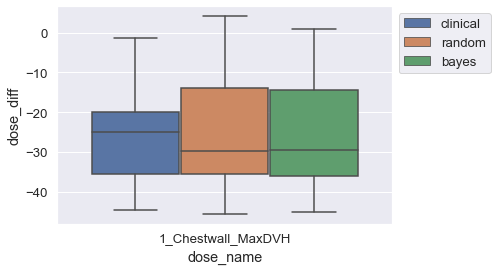

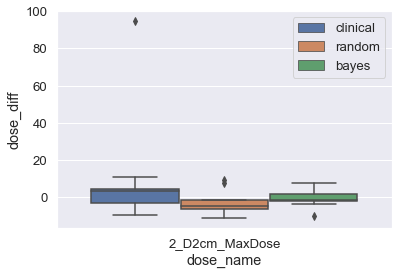

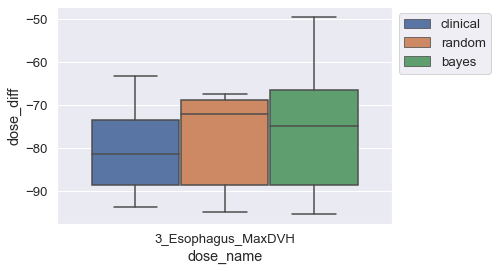

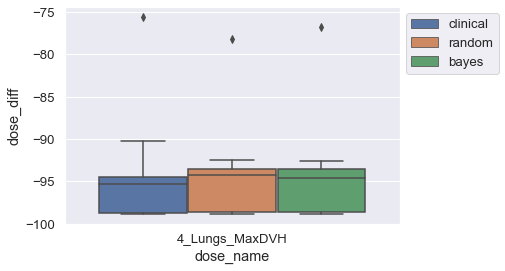

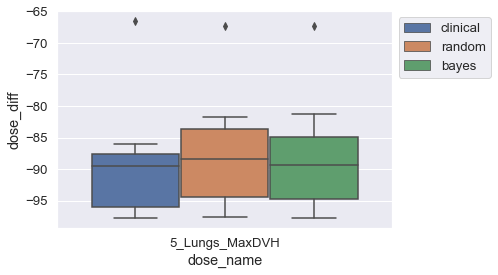

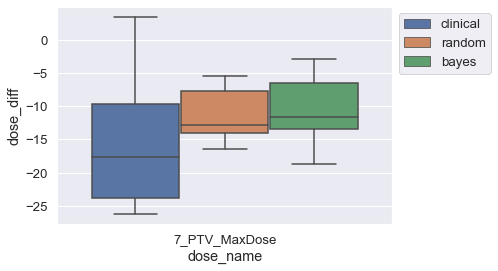

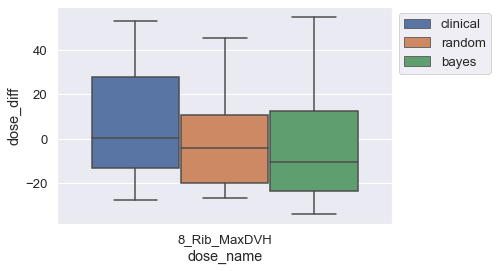

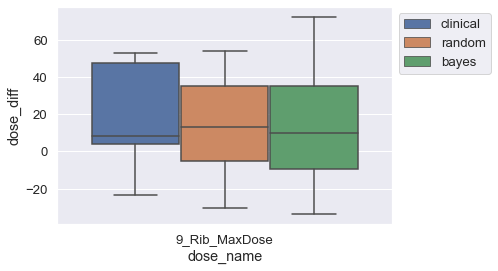

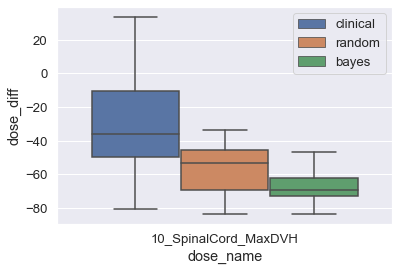

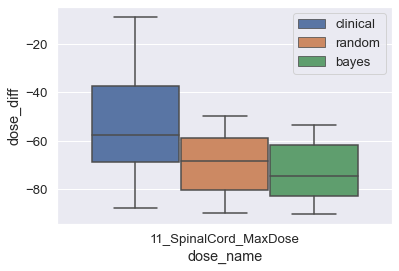

In [8]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_diff', hue='plan_type', data=full_df[full_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare plans

In [9]:
def get_plan_diff(row):
    return get_percent_diff(row, 'dose_val_x', 'dose_val_y')

def get_compare(plan, ref):
    df = pd.merge(
        get_dose_df(plan),
        get_dose_df(ref),
        on=['patient', 'dose_name'])
    df['compare_type'] = plan + '2' + ref
    df['percent_diff'] = df.apply(get_plan_diff, axis=1)
    return df[['patient', 'dose_name', 'compare_type', 'percent_diff']]

pair_list = [['random', 'clinical'], ['bayes', 'clinical'], ['bayes', 'random']]
compare_df = pd.concat([get_compare(*pair) for pair in pair_list]).reset_index(drop=True)
compare_df.groupby(['compare_type', 'dose_name']).describe()

percent_diff                        \
                                             count       mean        std   
compare_type    dose_name                                                  
bayes2clinical  10_SpinalCord_MaxDVH          10.0 -43.908530  22.511695   
                11_SpinalCord_MaxDose         10.0 -36.716295  15.599948   
                1_Chestwall_MaxDVH            10.0  -0.269497   9.150103   
                2_D2cm_MaxDose                10.0  -5.295168  15.969302   
                3_Esophagus_MaxDVH            10.0  22.152441  36.636976   
                4_Lungs_MaxDVH                10.0   9.619163  23.097052   
                5_Lungs_MaxDVH                10.0  14.652739  24.305584   
                7_PTV_MaxDose                 10.0   6.538658  12.288355   
                8_Rib_MaxDVH                  10.0  -9.165740  10.820122   
                9_Rib_MaxDose                 10.0  -5.921799  11.382523   
bayes2random    10_SpinalCord_MaxDVH          10.0 -20.669129  16.280070   
                11_SpinalCord_MaxDose         10.0 -11.975522  13.962678   
                1_Chestwall_MaxDVH            10.0  -0.994602   2.582760   
                2_D2cm_MaxDose                10.0   2.537495   4.708588   
                3_Esophagus_MaxDVH            10.0   4.497637  24.729245   
                4_Lungs_MaxDVH                10.0  -1.665620   4.938758   
                5_Lungs_MaxDVH                10.0  -4.434916   6.071123   
                7_PTV_MaxDose                 10.0   0.873623   6.640789   
                8_Rib_MaxDVH                  10.0  -2.118592   7.061809   
                9_Rib_MaxDose                 10.0  -1.654559   6.930765   
random2clinical 10_SpinalCord_MaxDVH          10.0 -30.335673  21.364692   
                11_SpinalCord_MaxDose         10.0 -27.328446  16.695447   
                1_Chestwall_MaxDVH            10.0   0.888346  10.536623   
                2_D2cm_MaxDose                10.0  -7.450935  16.303971   
                3_Esophagus_MaxDVH            10.0  19.400677  38.477597   
                4_Lungs_MaxDVH                10.0  11.618915  23.351977   
                5_Lungs_MaxDVH                10.0  20.002087  24.078436   
                7_PTV_MaxDose                 10.0   5.552614   9.199686   
                8_Rib_MaxDVH                  10.0  -7.069596  10.455798   
                9_Rib_MaxDose                 10.0  -4.454794   7.535672   

                                                                        \
                                             min        25%        50%   
compare_type    dose_name                                                
bayes2clinical  10_SpinalCord_MaxDVH  -76.751439 -53.737427 -47.553604   
                11_SpinalCord_MaxDose -56.432580 -46.924924 -39.114965   
                1_Chestwall_MaxDVH    -20.277728  -0.794273   0.681840   
                2_D2cm_MaxDose        -47.978619  -5.712153  -2.746604   
                3_Esophagus_MaxDVH    -58.720034   3.211857  27.836150   
                4_Lungs_MaxDVH        -40.198801   0.184296  10.502539   
                5_Lungs_MaxDVH        -29.622139   0.943098  11.603689   
                7_PTV_MaxDose         -14.457790  -2.470836   7.280077   
                8_Rib_MaxDVH          -29.815960 -10.567117  -7.564714   
                9_Rib_MaxDose         -15.541948 -14.107209  -9.722415   
bayes2random    10_SpinalCord_MaxDVH  -47.129231 -31.677137 -17.325122   
                11_SpinalCord_MaxDose -42.345795 -16.041696  -7.709616   
                1_Chestwall_MaxDVH     -6.085761  -2.606818  -0.408663   
                2_D2cm_MaxDose         -6.137108  -0.133589   3.277315   
                3_Esophagus_MaxDVH    -14.991299  -9.705187  -4.868068   
                4_Lungs_MaxDVH         -9.981215  -5.007810  -1.918518   
                5_Lungs_MaxDVH        -11.762046  -8.982073  -5.976183   
                7_PTV_MaxDose          -7.343666 

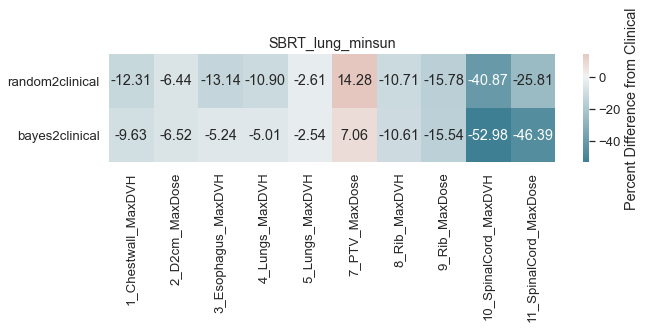

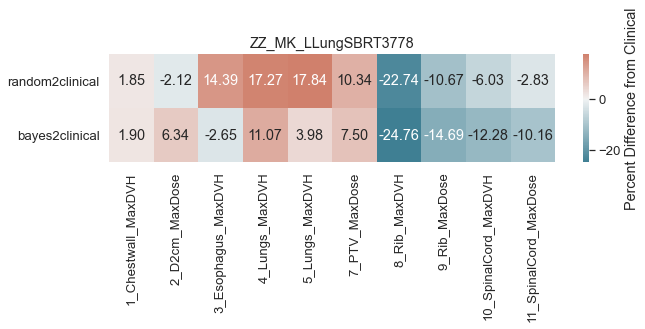

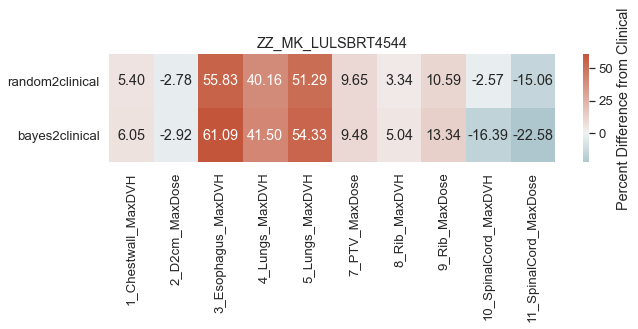

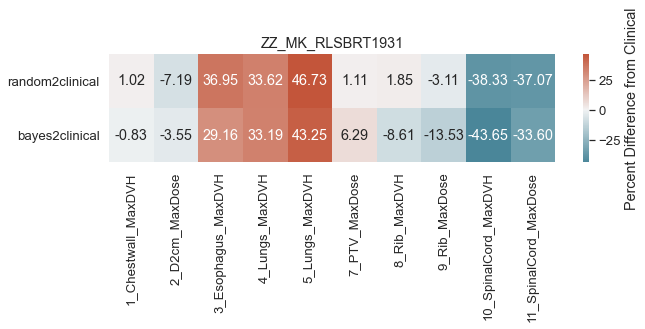

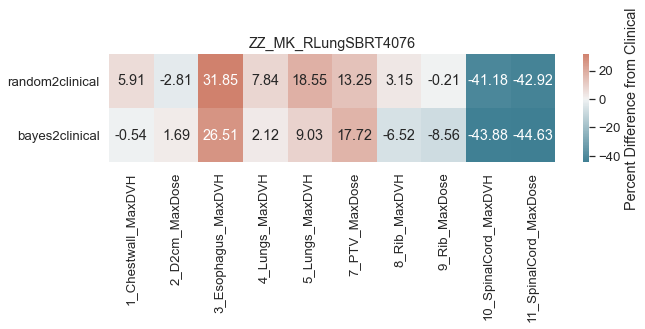

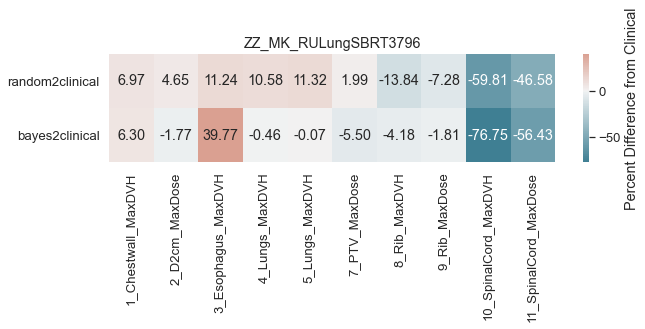

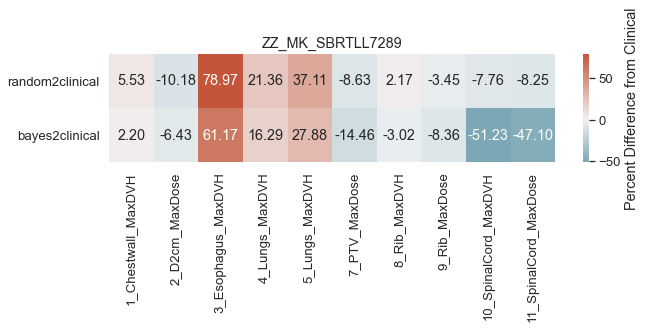

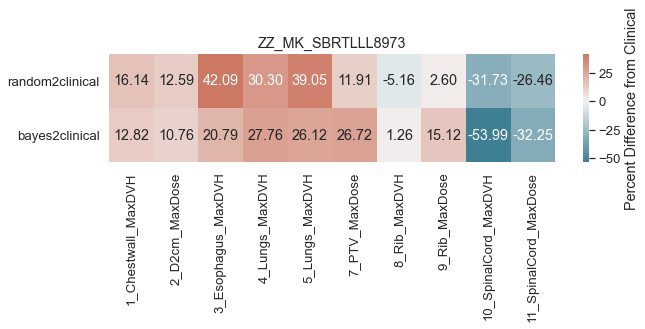

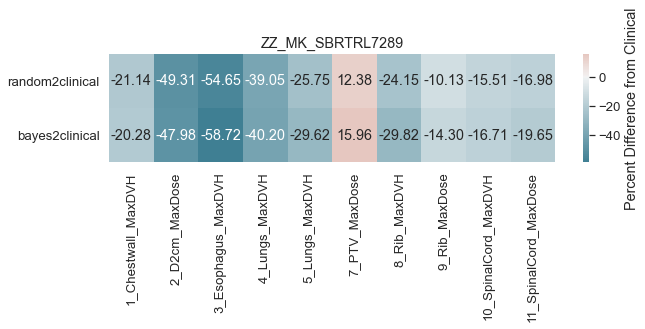

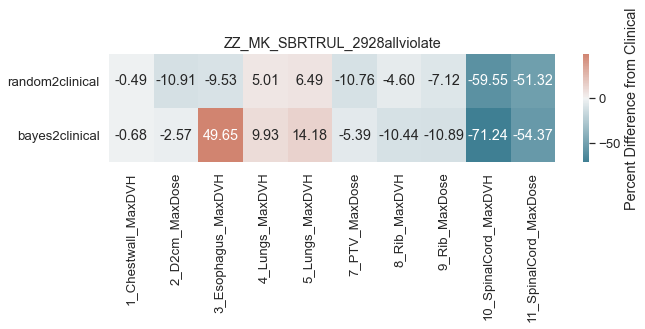

In [10]:
compare_types = ['random2clinical', 'bayes2clinical']
for patient in patients:
    df_sub = compare_df[compare_df['patient'] == patient]
    dose_vals = np.array([df_sub[df_sub['compare_type'] == compare_type]['percent_diff'].values
                          for compare_type in compare_types])
    fig, ax = plt.subplots(figsize=(dose_vals.shape[1], dose_vals.shape[0]))
    sns.heatmap(dose_vals, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference from Clinical'}, ax=ax)
    ax.set_xticklabels(par_names, rotation=90)
    ax.set_yticklabels(compare_types, rotation=0)
    ax.set_title(patient)

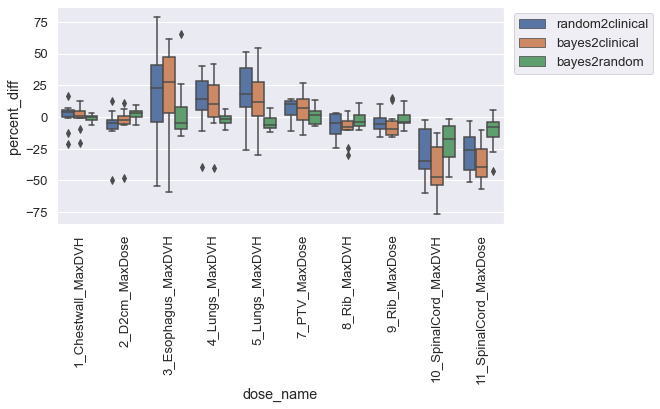

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='percent_diff', hue='compare_type', data=compare_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.35, 1));

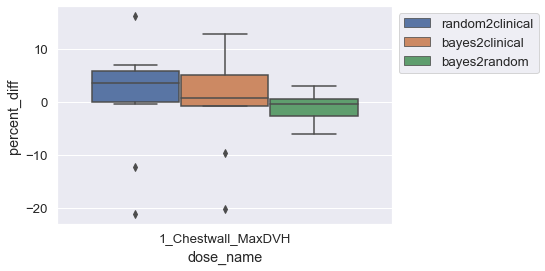

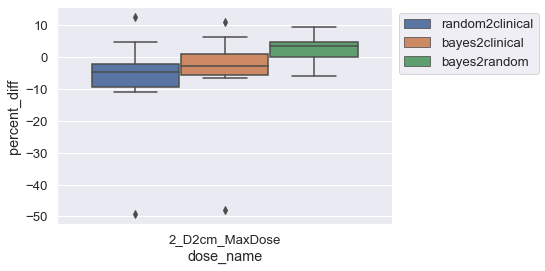

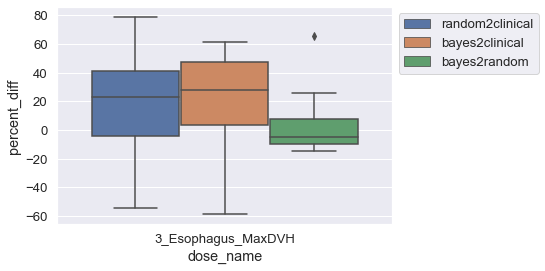

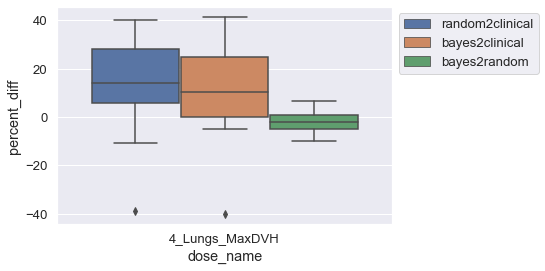

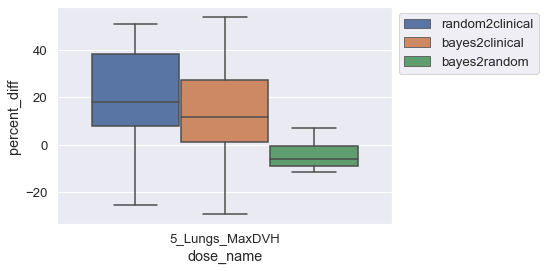

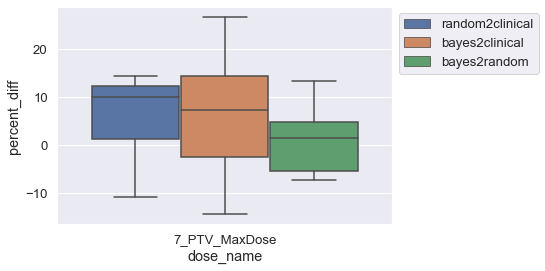

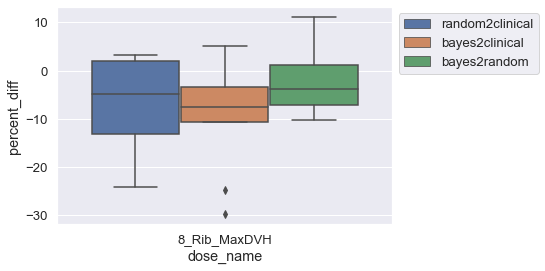

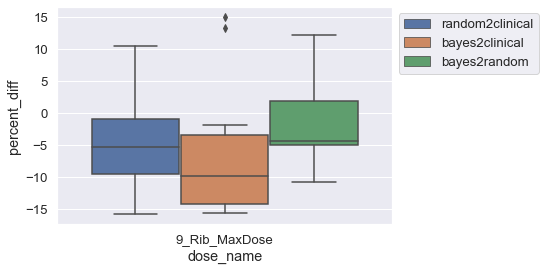

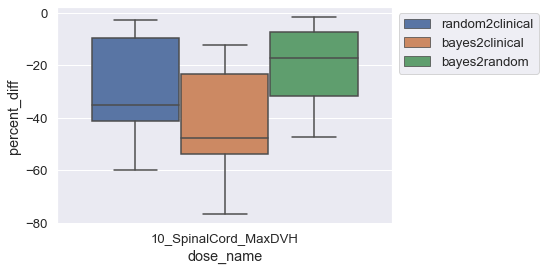

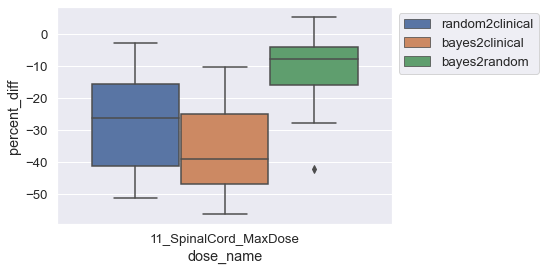

In [12]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='percent_diff', hue='compare_type', data=compare_df[compare_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Various questions in paper (e.g., when one higher than other plan, how compare to gamma?)

In [13]:
# Where random plan doses are worse than clinical plan doses, how do they compare to gamma?
# Where clinical plan doses are worse than random plan doses, how do they compare to gamma?
# Where Bayesian plan doses are worse than clinical plan doses, how do they compare to gamma?
# Where clinical plan doses are worse than Bayesian plan doses, how do they compare to gamma?
# Where clinical plan doses were worse than gamma, how do they compare with random and Bayesian plans?
# Where random plan doses were worse than gamma, how do they compare to clinical and Bayesian plans?
# Where Bayesian plan doses were worse than gamma, how do they compare to clinical and random plans?

# def get_compare(plan, ref):
#     df = pd.merge(
#         get_dose_df(plan),
#         get_dose_df(ref),
#         on=['patient', 'dose_name'])
#     df['compare_type'] = plan + '2' + ref
#     df['percent_diff'] = df.apply(get_plan_diff, axis=1)
#     return df[['patient', 'dose_name', 'compare_type', 'percent_diff']]

# pair_list = [['random', 'clinical'], ['clinical', 'random'],
#              ['bayes', 'clinical'], ['clinical', 'bayes'],
#              ['random', 'bayes'], ['bayes', 'random']]
# compare_df = pd.concat([get_compare(*pair) for pair in pair_list]).reset_index(drop=True)
# compare_df.groupby(['compare_type', 'dose_name']).describe()

# def get_compare_name(row):
#     return row['plan_type'] + '2gamma'

# full_df['compare_type'] = full_df.apply(get_compare_name, axis=1)
# cols = ['patient', 'plan_type', 'dose_name', 'compare_type', 'dose_diff']

# compare_df = pd.merge(
#     full_df[cols].rename(columns={'dose_diff': 'percent_diff'}),
#     on=['patient', 'plan_type', 'dose_name'
# )

## With Stopping Conditions

In [13]:
stop_df = pd.concat([get_dose_df(plan_type, stop=True) for plan_type in ['clinical', 'random', 'bayes']])
stop_df.groupby(['dose_name', 'plan_type'])['dose_val'].describe()

count         mean          std          min  \
dose_name             plan_type                                                 
10_SpinalCord_MaxDVH  bayes       10.0   562.956077   238.966253   223.914544   
                      clinical    10.0   962.580259   526.320073   265.033790   
                      random      10.0   675.319381   346.710932   223.914544   
11_SpinalCord_MaxDose bayes       10.0   827.526935   379.109659   262.147980   
                      clinical    10.0  1220.050488   707.911458   315.778000   
                      random      10.0   977.639525   529.707719   262.147980   
1_Chestwall_MaxDVH    bayes       10.0  2187.862894   426.295651  1670.525235   
                      clinical    10.0  2213.491370   377.905211  1665.838022   
                      random      10.0  2201.230398   460.693018  1695.684308   
2_D2cm_MaxDose        bayes       10.0  2630.810528   311.132098  2279.141113   
                      clinical    10.0  2827.429706   712.423734  2321.516357   
                      random      10.0  2648.130540   330.683723  2304.464111   
3_Esophagus_MaxDVH    bayes       10.0   461.645908   299.853442    93.327185   
                      clinical    10.0   365.552510   198.664484   116.129008   
                      random      10.0   487.959871   313.778538    93.327185   
4_Lungs_MaxDVH        bayes       10.0    67.604128    74.034079    13.749885   
                      clinical    10.0    68.351877    82.148902    12.869589   
                      random      10.0    68.834479    78.307251    13.587186   
5_Lungs_MaxDVH        bayes       10.0   145.564092   108.803649    27.417393   
                      clinical    10.0   132.954377   113.179787    27.435992   
                      random      10.0   149.574634   113.619561    30.680599   
7_PTV_MaxDose         bayes       10.0  7498.438088   708.431736  6542.063965   
                      clinical    10.0  6784.967125   840.565515  5897.977051   
                      random      10.0  7789.916502  1052.682829  6364.934082   
8_Rib_MaxDVH          bayes       10.0  3130.999227   815.511729  2236.048770   
                      clinical    10.0  3465.115452   891.595498  2311.379703   
                      random      10.0  3254.334633  1069.606092  2136.971666   
9_Rib_MaxDose         bayes       10.0  4491.253420  1382.069251  2596.907715   
                      clinical    10.0  4717.237702  1135.317806  3062.360528   
                      random      10.0  4765.161140  1699.988403  2565.810547   

                                         25%          50%          75%  \
dose_name             plan_type                                          
10_SpinalCord_MaxDVH  bayes       422.328242   528.145198   707.330717   
                      clinical    684.650965   871.041300  1217.526958   
                      random      517.507205   571.310811   832.630179   
11_SpinalCord_MaxDose bayes       584.330078   837.213593  1020.566277   
                      clinical    812.829694  1099.297415  1628.339277   
                      random      651.338684   946.047882  1145.125061   
1_Chestwall_MaxDVH    bayes      1913.744150  2093.095406  2548.220651   
                      clinical   1932.207474  2252.075721  2402.387757   
                      random     1913.386286  2093.095449  2464.112400   
2_D2cm_MaxDose        bayes      2398.959656  2587.924683  2752.556910   
                      clinical   2381.644292  2587.827079  2984.870924   
                      random     2357.233276  2537.243164  2968.233942   
3_Esophagus_MaxDVH    bayes       213.068972   458.808586   581.848945   
                      clinical    213.350509   348.110062   495.384585   
                      random      201.269418   522.301514   685.151881   
4_Lungs_MaxDVH        bayes        16.217636    62.194092    74.491591   
                      clinical     14.167678    53.909187    64.422450   
                      random      

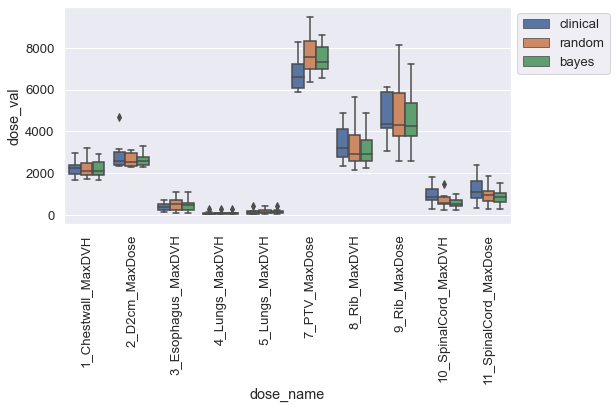

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=stop_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1, 1));

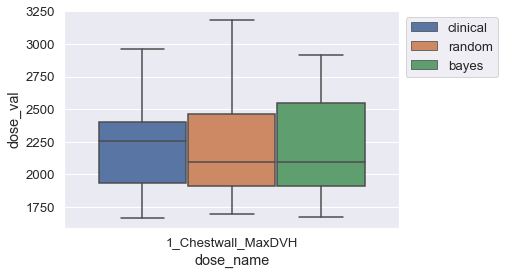

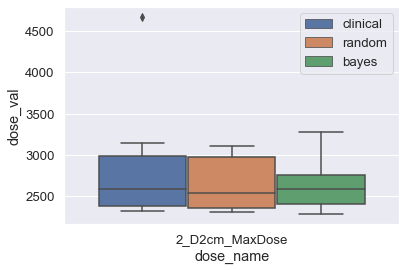

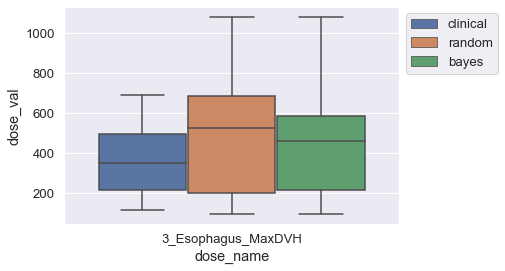

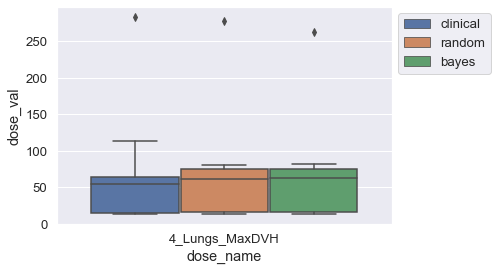

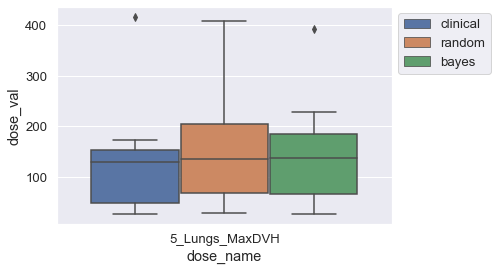

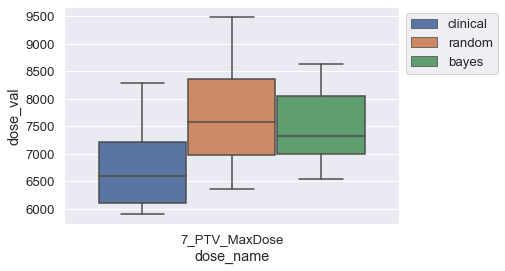

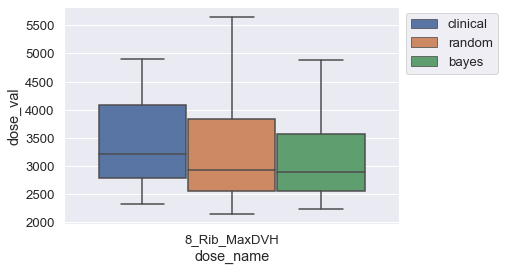

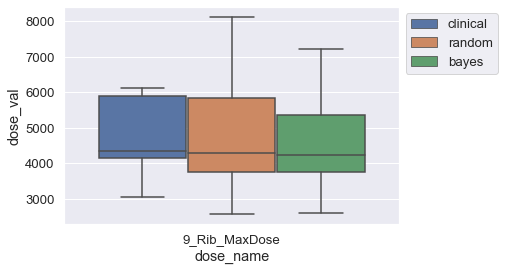

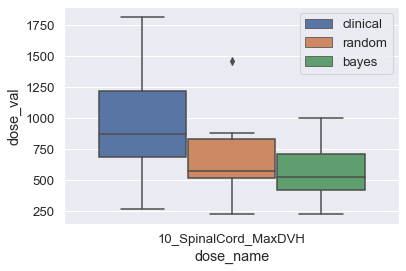

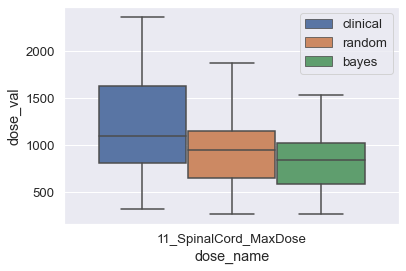

In [15]:
for dose in par_names:
    fig, ax = plt.subplots()
    sns.boxplot(x='dose_name', y='dose_val', hue='plan_type', data=stop_df[stop_df['dose_name'] == dose])
    ax.legend(bbox_to_anchor=(1, 1));

### Compare to 100 iterations